In [80]:
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from estimagic_stargazer.stargazer import Stargazer 
from IPython.core.display import HTML, Latex
from tabulate import tabulate
from collections import namedtuple
import numpy as np
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = ['Age', 'Sex', 'BMI', 'ABP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
df['target'] = diabetes.target

est = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:4]])).fit()
est2 = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:6]])).fit()



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
def extract_params_from_sm(model):
    to_concat = []
    params_list = ["params", "pvalues", "bse"]
    for col in params_list:
        to_concat.append(getattr(model, col))
    to_concat.append(model.conf_int()[0])
    to_concat.append(model.conf_int()[1])
    params_df = pd.concat(to_concat, axis=1)
    params_df.columns = ["value", "pvalue", "standard_error", "ci_lower", "ci_upper"]
    return params_df


def extract_info_from_sm(model):
    info = {}
    key_values = [
        "rsquared",
        "rsquared_adj",
        "scale",
        "fvalue",
        "f_pvalue",
        "df_model",
        "df_resid",
    ]
    for kv in key_values:
        info[kv] = getattr(model, kv)
    info["dependent_variable"] = model.model.endog_names

    return info


In [82]:
# use the functions defined above to create estimation result that is namedtuple
namedtuplee = namedtuple("namedtuplee", "params info")
est3 = namedtuplee(
params=extract_params_from_sm(est2),
info={**extract_info_from_sm(est2)},
)


In [4]:
# using est3, create dictionary
est4 = {}
est4['params'] = est3.params
est4['info'] = est3.info


In [5]:
# using est3, create dictionary
est5 = {}
est5['params'] = est3.params
est5['info'] = est3.info


In [6]:
# check that code runs for non-list inputs
stargazer2=Stargazer(est3)

In [7]:
HTML(stargazer2.generate_observations_html())

Observations,442.0


In [8]:
# check stargazer works for sns regression result, dictionary and namedtuple
stargazer=Stargazer([est,est2,est4,est5])

In [9]:
HTML(stargazer.generate_observations_html())

Observations,442.0,442.0,442.0,442.0


In [17]:
mdict = {"a":5}
mdict.get("b",np.NaN)

nan

In [28]:
np.sqrt(np.nan)

nan

In [9]:
HTML(stargazer.render_html())


In [10]:
type(Latex(stargazer.render_latex()))

IPython.core.display.Latex

In [11]:
stargazer.custom_columns(['Model 1','Model 2','Model3'],[1,1,1])

In [12]:
HTML(stargazer.render_html())

In [13]:
stargazer.custom_columns('Test model name')

In [14]:
HTML(stargazer.render_html())

In [15]:

stargazer.show_model_numbers(False)

In [16]:
HTML(stargazer.render_html())

In [17]:
stargazer.significant_digits(2)

In [18]:
HTML(stargazer.render_html())

In [19]:
stargazer.show_confidence_intervals(True)

In [20]:
HTML(stargazer.render_html())

In [21]:
stargazer.covariate_order(['BMI', 'Age', 'S1', 'Sex'])

In [22]:
HTML(stargazer.render_html())

In [23]:
stargazer.rename_covariates({'Age': 'Oldness'})

In [24]:
HTML(stargazer.render_html())

In [25]:
stargazer.show_degrees_of_freedom(False)

In [26]:
HTML(stargazer.render_html())

In [27]:
stargazer.add_custom_notes(['First note', 'Second note'])

In [28]:
HTML(stargazer.render_html())

In [29]:
stargazer.significance_levels([0.1, 0.05, 0.07])

In [30]:
HTML(stargazer.render_html())

In [44]:
stargazer.append_notes(False)

In [45]:
HTML(stargazer.render_html())

# More flexible significance levels

In [64]:
res_sig=""
sig_char = "*"
listt =[0.1,0.025,0.01,0.05]
sig_levels = sorted(listt)
p_value = 0
if p_value<sig_levels[0]:
    res_sig += sig_char*len(listt)
else:
    for i in np.arange(len(sig_levels[1:]))+1:
        if sig_levels[i-1]<=p_value<sig_levels[i]:
            res_sig+=sig_char*(len(sig_levels)-i)

res_sig

'****'

## make notes compatible

In [123]:
notes_text = """
 <td colspan="{}" style="text-align: right">   """.format(3)
for i in range(len(sig_levels)-1):
    notes_text+="<sup>"+"*"*(len(sig_levels)-i)+"""</sup>p&lt;{}; """.format(sig_levels[i])
notes_text+="""<sup>*</sup>p&lt;{} </td>""".format(sig_levels[-1])
    

#### Check output

In [124]:
HTML(notes_text)

In [88]:
est3.params["sig_icon"] = pd.cut(
            est3.params["pvalue"],
            bins=[-1] + sorted(sig_levels) + [2],
            labels=["*" * (len(sig_levels)-i) for i in range(len(sig_levels) + 1)],
        )

In [111]:
%timeit est3.params["sig_icon_1"] =['*'*i for i in (len(sig_levels)-np.digitize(est3.params.pvalue,[-1] + sorted(sig_levels) + [2])+1)]

351 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [112]:
%timeit est3.params["sig_icon_2"] =pd.cut(est3.params["pvalue"], bins=[-1] + sorted(sig_levels) + [2],labels=["*" * (len(sig_levels)-i) for i in range(len(sig_levels) + 1)],)

2.32 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [125]:
est3.params

,value,pvalue,standard_error,ci_lower,ci_upper,sig_icon,sig_icon_1,sig_icon_2
const,152.133484,6.764758e-193,2.853063,146.525981,157.740987,****,****,****
Age,24.703695,7.058611e-01,65.411058,-103.857320,153.264710,,,
Sex,-82.862181,2.020225e-01,64.850570,-210.321594,44.597231,,,
BMI,789.742054,4.243330e-28,66.886785,658.280598,921.203509,****,****,****
ABP,397.582705,3.604149e-08,70.869661,258.293174,536.872235,****,****,****
S1,197.852376,1.696004e-01,143.811973,-84.800339,480.505090,,,
S2,-169.250629,2.363914e-01,142.744232,-449.804771,111.303513,,,


In [182]:
arrays = [np.array(['bar', 'bar', 'bar', 'baz', 'foo', 'foo', 'qux', 'qux']),
   ....:           np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'])]

In [183]:
s = pd.Series(np.random.randn(8), index=arrays)


In [165]:
s.index


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]])

In [305]:
metalist = [[] for i in range(len(s.index.values[0]))]
for i in range(len(metalist)):
    for j in s.index.values:
        metalist[i].append(j[i]) 
ulist = [[] for i in range(len(s.index.values[0]))]
for i,l in enumerate(metalist):
    for j,n in enumerate(l):
        if j == 0:
            ulist[i].append(str(n))
        elif j>0:
            if l[j] == l[j-1]:
                ulist[i].append('')
            else:
                ulist[i].append(str(n))


In [287]:
metalist

[['bar', 'bar', 'bar', 'baz', 'foo', 'foo', 'qux', 'qux'],
 ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [306]:
ulist[0]=ulist[0][:-1]
ulist[1]=ulist[1][:-1]

In [341]:
df=pd.DataFrame(ulist).transpose()
df.columns = ['a','b']


In [344]:
df.loc[0][0]

'bar'

In [295]:
x[1].append('s')

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [267]:
metalist

[['bar', 'bar', 'bar', 'baz', 'foo', 'foo', 'qux', 'qux'],
 ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

bar  one   -1.685687
     two   -0.699576
     one   -0.343732
baz  two   -1.157404
foo  one   -0.027253
     two    1.004422
qux  one   -0.105928
     two   -0.511576
dtype: float64

In [317]:
len(metalist[0])

8

In [319]:
df1=pd.DataFrame(ulist).transpose()


In [325]:
df1.index = list('abcdefg')

In [335]:
s.index = pd.MultiIndex.from_tuples(mi1)

In [330]:
mi1 =s.index.values

In [332]:
mi1[0] = ('bar','qu')

In [336]:
isinstance(('bar','qu'),tuple)

True

In [345]:
est3.params.index.nlevels

1

In [347]:
isinstance(s.index,pd.MultiIndex)

True

In [349]:
mi1.nlevels

AttributeError: 'numpy.ndarray' object has no attribute 'nlevels'

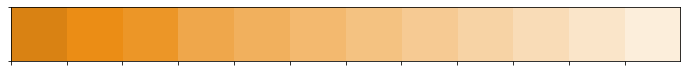

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt
mono_blue = {
    12: ["#547482", "#5c7f8e", "#63899a", "#6f92a2", "#7b9baa", "#87a4b1", "#93adb9", "#9fb6c1", "#abbfc8", "#b6c8d0", "#c2d1d8", "#cedae0"],
}

mono_red = {
    12: ["#a04d35", "#b3563b", "#c26246", "#c87259", "#ce826c", "#d5937f", "#dba392", "#e0b1a3", "#e5bdb1", "#eacac0", "#efd6cf", "#f4e3de"]
}

mono_yellow = {
    12: ["#d98213", "#eb8d15", "#ec9627", "#efa74b", "#f1b05d", "#f3b96f", "#f4c281", "#f6ca93", "#f7d3a5", "#f9dcb7", "#fae5c9", "#fceedb"
        ]
}


mono_green = {
    12: ["#606449", "#6b6f51", "#767b5a", "#818662","#8c916a", "#959a75", "#9ea280", "#a6ab8c", "#afb397", "#b8bba2", "#c1c4ae", "#c9ccb9"
        ]
}


mono_orange = {
    12: ["#d35b13", "#ea6516", "#ec752e", "#ee8445", "#f0935c", "#f2a374", "#f4b28b", "#f6bf9f", "#f8cbb1", "#f9d7c3", "#fbe3d5", "#fdefe7"]
}


mono_purple = {
    12: ["#4e3537", "#5d4042", "#6c4a4d", "#7b5458", "#8a5f63", "#996a6e", "#a2777a", "#a98286", "#b18e91", "#b9999c", "#c1a5a8", "#c9b1b3"]
}

for pal in mono_yellow.values():
    sns.palplot(pal)
    plt.show()